In [1]:
import numpy as np
from scipy.optimize import fsolve

def compute_L1(mu):
    """
    Compute the L1 Lagrange point for the given mass ratio mu.
    For all the mathematics, see L13.
    """
    def polynomial(x):
        return x**5 - (3 - mu)*x**4 + (3 - 2*mu)*x**3 - mu*x**2 + 2*mu*x - mu
    # Estimation for eps_0
    eps = (mu / (3 * (1- mu)))**(1/3) # See L13
    L1 = fsolve(polynomial, eps)
    return mu-1+L1[0] # See L13

def compute_L2(mu):
    """
    Compute the L2 Lagrange point for the given mass ratio mu.
    For all the mathematics, see L13.
    """
    def polynomial(x):
        return x**5 + (3 - mu)*x**4 + (3 - 2*mu)*x**3 - mu*x**2 - 2*mu*x - mu
    # Estimation for eps_0
    eps_0 = (mu / (3 * (1- mu)))**(1/3) # See L13
    L2 = fsolve(polynomial, eps_0)
    return mu-1-L2[0] # See L13

def compute_L3(mu):
    """
    Compute the L3 Lagrange point for the given mass ratio mu.
    For all the mathematics, see L13.
    """
    def polynomial(x):
        return x**5 + (2 + mu)*x**4 + (1 + 2*mu)*x**3 - (1 - mu)*x**2 - \
               2*(1 - mu)*x - (1 - mu)
    # Estimation for eps_0
    eps_0 = 1 - (7 / 12)*mu # See L13
    L3 = fsolve(polynomial, eps_0)
    return mu + L3[0] # See L13

# Example usage
mu = 0.1  # Example mass ratio
L1 = compute_L1(mu)
L2 = compute_L2(mu)
L3 = compute_L3(mu)

print(f"L1: {L1},\nL2: {L2},\nL3: {L3}")


L1: -0.6090351100232015,
L2: -1.2596998329023315,
L3: 1.0416089085718845


In [2]:
# Wrapper function
def compute_Lagrange_pt(mu, L):
    """
    Compute the position of the Lagrange point L for the given mass ratio mu.
    """
    if L == 1:
        return compute_L1(mu)
    elif L == 2:
        return compute_L2(mu)
    elif L == 3:
        return compute_L3(mu)
    else:
        raise ValueError("Lagrange point must be 1, 2 or 3")

In [3]:
mu = 0.1
L1 = compute_Lagrange_pt(mu, 1)
L2 = compute_Lagrange_pt(mu, 2)
L3 = compute_Lagrange_pt(mu, 3)

print(f"L1: {L1},\nL2: {L2},\nL3: {L3}")

L1: -0.6090351100232015,
L2: -1.2596998329023315,
L3: 1.0416089085718845


In [4]:
mu = 0.2
L1 = compute_Lagrange_pt(mu, 1)
L2 = compute_Lagrange_pt(mu, 2)
L3 = compute_Lagrange_pt(mu, 3)

print(f"L1: {L1},\nL2: {L2},\nL3: {L3}")

L1: -0.43807595853836445,
L2: -1.2710486907398812,
L3: 1.082839464202244


Compute Jacobi constant for the points

# IMPORTANT
### CHANGED OMEGA FROM OTHER FILES

In [5]:
def r1(mu, x, y):
    return np.sqrt((x - mu)**2 + y**2)

def r2(mu, x, y):
    return np.sqrt((x-mu+1)**2 + y**2)

def OMEGA(mu, x, y):
    return 0.5 * (x**2 + y**2) + (1 - mu) / r1(mu,x,y) + mu / r2(mu, x, y) \
           + 0.5 * (1 - mu) * mu

def ODE_R3BP(t, mu, X):
    # ODEs of the restricted three body problem
    return [X[2], X[3], 2*X[3] + X[0] - (1 - mu)*(X[0] - mu) / \
            r1(mu,X[0],X[1])**3 - mu * (X[0] - mu + 1) / \
            r2(mu,X[0],X[1])**3, -2*X[2] + X[1] - (1 - mu) * X[1] \
            / r1(mu,X[0],X[1])**3 - mu * X[1] / r2(mu,X[0],X[1])**3]

def Jacobi_first_integral(mu, x, y, vx, vy):
    # Function to compute the Jacobi first integral
    # This should be constant for a given value of mu
    return 2*OMEGA(mu, x, y) - (vx**2 + vy**2)

In [6]:
def compute_jacobi_const_Li(mu, L):
    '''
    Compute the Jacobi constant for the Lagrange point 1, 2 or 3
    '''
    xLi = compute_Lagrange_pt(mu, L)
    C = Jacobi_first_integral(mu, xLi, 0, 0, 0)
    return C 

In [7]:
# Compute the Jacobi constant for the Lagrange points
mu = 0.1
C_L1 = compute_jacobi_const_Li(mu, 1)
C_L2 = compute_jacobi_const_Li(mu, 2)
C_L3 = compute_jacobi_const_Li(mu, 3)

print(f"C_L1: {C_L1},\nC_L2: {C_L2},\nC_L3: {C_L3}")

C_L1: 3.6869532298798946,
C_L2: 3.5566844258406483,
C_L3: 3.1895781504493814


In [11]:
# Import test
from Lagrange_computations import compute_jacobi_const_Li as jacobi_const
mu = 0.1
C_L1 = jacobi_const(mu, 1)
C_L2 = jacobi_const(mu, 2)
C_L3 = jacobi_const(mu, 3)

print(f"C_L1: {C_L1},\nC_L2: {C_L2},\nC_L3: {C_L3}")

C_L1: 3.6869532298798946,
C_L2: 3.5566844258406483,
C_L3: 3.1895781504493814


In [8]:
# Compute the Jacobi constant for the Lagrange points
mu = 0.2
C_L1 = compute_jacobi_const_Li(mu, 1)
C_L2 = compute_jacobi_const_Li(mu, 2)
C_L3 = compute_jacobi_const_Li(mu, 3)

print(f"C_L1: {C_L1},\nC_L2: {C_L2},\nC_L3: {C_L3}")

C_L1: 3.96465327630637,
C_L2: 3.7123933328511765,
C_L3: 3.35732042100598


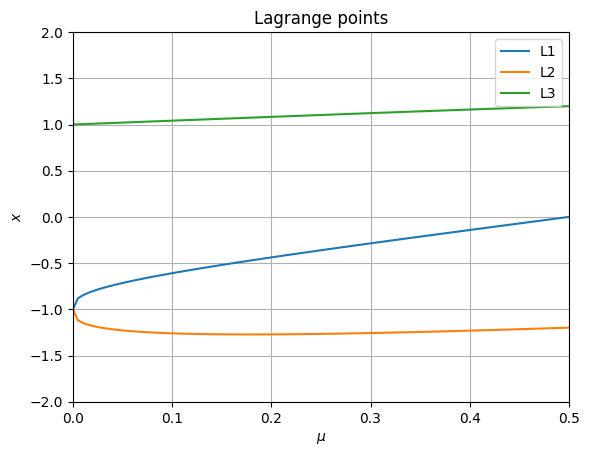

In [9]:
#  Generate a plot in (mu,x) where mu varies in (0,0.5] and
# x=x(Li), i=1,2,3 (so there appear 3 curves).

import matplotlib.pyplot as plt

mu = np.linspace(0, 0.5, 100)
L1 = np.zeros(len(mu))
L2 = np.zeros(len(mu))
L3 = np.zeros(len(mu))

for i in range(len(mu)):
    L1[i] = compute_Lagrange_pt(mu[i], 1)
    L2[i] = compute_Lagrange_pt(mu[i], 2)
    L3[i] = compute_Lagrange_pt(mu[i], 3)

plt.plot(mu, L1, label="L1")
plt.plot(mu, L2, label="L2")
plt.plot(mu, L3, label="L3")
plt.xlabel("$\mu$")
plt.ylabel("$x$")
plt.legend()

# make the plot prettier
plt.grid(True)
plt.xlim([0, 0.5])
plt.ylim([-2, 2])
plt.title("Lagrange points")

# make it even more prettier
#plt.rcParams.update({'font.size': 18})
#plt.tight_layout()
plt.show()


C:\Users\rannu\AppData\Local\Temp\ipykernel_19000\2224305810.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return 0.5 * (x**2 + y**2) + (1 - mu) / r1(mu,x,y) + mu / r2(mu, x, y) \


Text(0.5, 1.0, 'Jacobi constant')

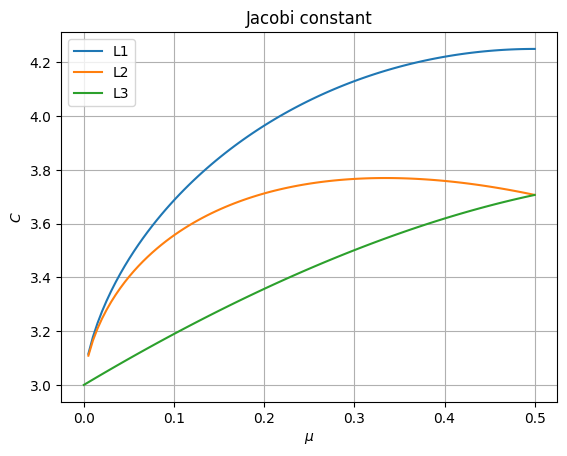

In [10]:
# Generate a plot in (mu,C) where mu varies in (0,0.5] and
# C=C(Li), i=1,2,3 (so there appear 3 curves).

mu = np.linspace(0, 0.5, 100)
C_L1 = np.zeros(len(mu))
C_L2 = np.zeros(len(mu))
C_L3 = np.zeros(len(mu))

for i in range(len(mu)):
    C_L1[i] = compute_jacobi_const_Li(mu[i], 1)
    C_L2[i] = compute_jacobi_const_Li(mu[i], 2)
    C_L3[i] = compute_jacobi_const_Li(mu[i], 3)

plt.plot(mu, C_L1, label="L1")
plt.plot(mu, C_L2, label="L2")
plt.plot(mu, C_L3, label="L3")
plt.xlabel("$\mu$")
plt.ylabel("$C$")
plt.legend()
plt.grid(True)
plt.title("Jacobi constant")
